In [19]:
# TODO
# convolution function 
# apply gaussian filter and maxican hat filter
# observe the effect of the filters size on the output

In [20]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [21]:
import cv2 as cv
import numpy as np

In [22]:
def convolution(img, kernel):
    # get image dimensions
    height, width, channels = img.shape

    # get kernel dimensions
    k_height, k_width = kernel.shape

    # calculate padding
    pad_height = k_height // 2
    pad_width = k_width // 2

    # pad the image
    padded_img = np.pad(img, ((pad_height, pad_height), (pad_width, pad_width), (0, 0)), mode='constant')

    # create output image
    output = np.zeros_like(img)

    # perform convolution
    for i in tqdm(range(height)):
        for j in range(width):
            for c in range(channels):
                output[i, j, c] = (kernel * padded_img[i:i+k_height, j:j+k_width, c]).sum()

    return output

In [27]:
# kernels
gaussian_kernel_3 = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16
maxican_hat_kernel_3 = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]]) / 8

# kernels 5*5
gaussian_kernel_5 = np.array([[1, 4, 6, 4, 1], [4, 16, 26, 16, 4], [7, 26, 41, 26, 7], [4, 16, 26, 16, 4], [1, 4, 6, 4, 1]]) / 273
maxican_hat_kernel_5 = np.array([[0, 0, 1, 0, 0], [0, 1, 2, 1, 0], [1, 2, -16, 2, 1], [0, 1, 2, 1, 0], [0, 0, 1, 0, 0]]) / 16

# read image
img = cv.imread('penguin.png')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# apply gaussian filter
gaussian_img_3 = convolution(img, gaussian_kernel_3)
gaussian_img_5 = convolution(img, gaussian_kernel_5)
# apply maxican hat filter
maxican_hat_img_3 = convolution(img, maxican_hat_kernel_3)
maxican_hat_img_5 = convolution(img, maxican_hat_kernel_5)

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Maxican Hat 5*5')

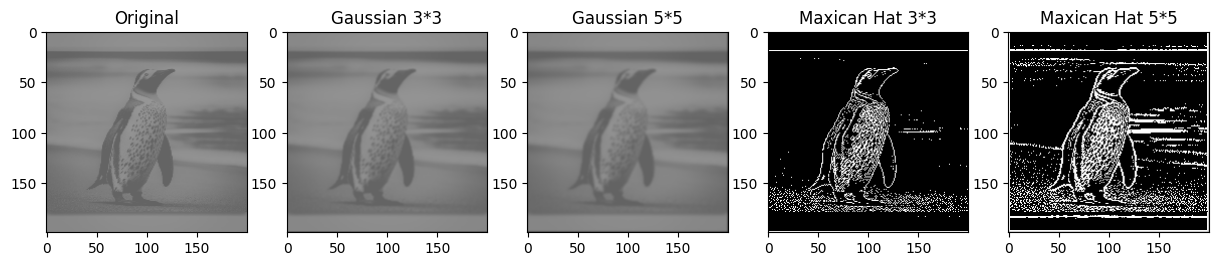

In [28]:
fig, axs = plt.subplots(1, 5, figsize=(15, 15))
axs[0].imshow(img)
axs[0].set_title('Original')
axs[1].imshow(gaussian_img_3)
axs[1].set_title('Gaussian 3*3')
axs[2].imshow(gaussian_img_5)
axs[2].set_title('Gaussian 5*5')
axs[3].imshow(maxican_hat_img_3)
axs[3].set_title('Maxican Hat 3*3')
axs[4].imshow(maxican_hat_img_5)
axs[4].set_title('Maxican Hat 5*5')

In [29]:
# read image
img2 = cv.imread('penguin2.png')
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

# apply gaussian filter
gaussian_img_3 = convolution(img2, gaussian_kernel_3)
gaussian_img_5 = convolution(img2, gaussian_kernel_5)
# apply maxican hat filter
maxican_hat_img_3 = convolution(img2, maxican_hat_kernel_3)
maxican_hat_img_5 = convolution(img2, maxican_hat_kernel_5)

  0%|          | 0/1960 [00:00<?, ?it/s]

  0%|          | 0/1960 [00:00<?, ?it/s]

  0%|          | 0/1960 [00:00<?, ?it/s]

  0%|          | 0/1960 [00:00<?, ?it/s]

Text(0.5, 1.0, 'Maxican Hat 5*5')

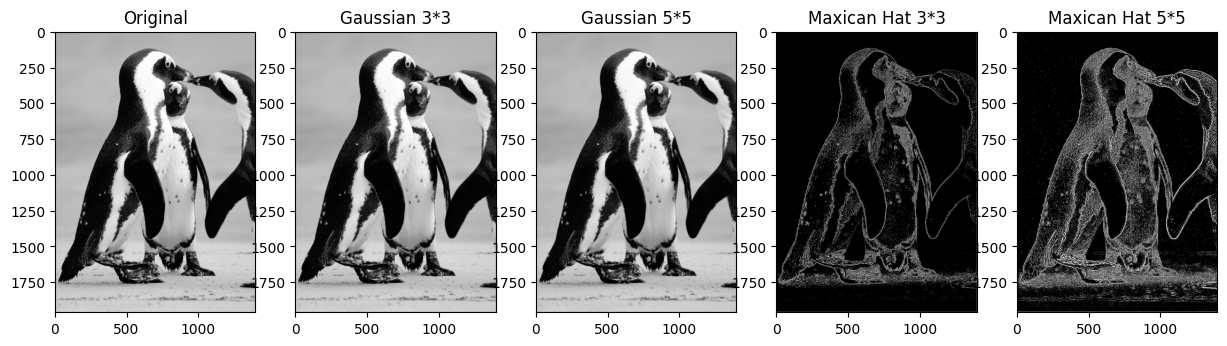

In [30]:
fig, axs = plt.subplots(1, 5, figsize=(15, 15))
axs[0].imshow(img2)
axs[0].set_title('Original')
axs[1].imshow(gaussian_img_3)
axs[1].set_title('Gaussian 3*3')
axs[2].imshow(gaussian_img_5)
axs[2].set_title('Gaussian 5*5')
axs[3].imshow(maxican_hat_img_3)
axs[3].set_title('Maxican Hat 3*3')
axs[4].imshow(maxican_hat_img_5)
axs[4].set_title('Maxican Hat 5*5')

# Discussion 
the gaussian filter is used to blur the image and reduce the noise 

the maxican hat filter is used to detect the edges of the image 

for gaussian filter, the larger size of kernel will make the image more blur because the kernel collect more intensity around the center

for maxican hat filter, the larger size of kernel will make the the kernel detect larger edge, however its will be more sensitive to the noise 